# Inaugural Project - Housing demand and taxation
### - *Mathilde Pilgaard, Klara Krogh Hammerum, Louise Albæk Jensen og Oluf Kelkjær*
A given household can spend cash $m$ on either housing or consumption $c$. Quality of housing, $h$, grants household utility and has the cost $p_{h}$ which is subject to progressive taxation and morgage cost as by equation (\ref{eq4}). The household aims to maximize utility such that optimal amounts of housing, $h^{*}$, and consumption, $c^{*}$, are met according to equation (\ref{eq1}).

\begin{align}
    c^{*},h^{*} & = \underset{c, h}{\operatorname{argmax}} c^{1-\phi}h^{\phi} \label{eq1}\tag{1} \\
    &s.t.\\
    \tilde{p}_{h} &= p_{h}\varepsilon \label{eq2}\tag{2} \\
    m &= \tau(p_{h},\tilde{p}_{h})+c \label{eq3}\tag{3} \\
    \tau(p_{h},\tilde{p}_{h})&=r p_{h}+\tau^{g}\tilde{p}_{h}+\tau^{p}max\{\tilde{p}_{h}-\bar{p},0\} \label{eq4}\tag{4}
\end{align}

The homes are taxed according to the public assesment being $\tilde{p}_{h}$. The assesment is politically decided according to equation (\ref{eq2}) by $\varepsilon$. Available cash for a given household is split between housing costs and consumption. $r$ denotes the carrying interest for purchasing a home, and $\tau^{g}$ denotes the base housing tax while the last element in equation (\ref{eq4}) homes valued above a certain cutoff, $\bar{p}$ are taxed at an additional rate $\tau^{p}$

# Q1
Construct a function that solves household's problem above. We let the market price of a home be equal to its quality:
$$ p_{h}=h $$
and assume that the household in question has cash-on-hand $m=0.5$. Notive that the monetary units is in millions DKK. In addition use the given parameter-values.
Knowing that the marketprice of a home is equal to its quality, we can use a scalar solver using the problems monotonicity.
$$ c = m - \tau(p_{h},\tilde{p}_{h})\Leftrightarrow $$
$$ c = m - rh-\tau^{g}h\varepsilon+\tau^{p}max\{h\varepsilon-\bar{p},0 \}   $$
meaning $c$ is implicit for a given level of $h$ through the budget constraint

In [1]:
# Importing relevant packages
from scipy import optimize
import numpy as np

par1 = {'m':0.5,
        'phi':0.3,
        'epsilon': 0.5,
        'r': 0.03,
        'tau_g': 0.012,
        'tau_p': 0.004,
        'p_bar': 3
}


# Creating utility function
def u_func(x, phi, **kwargs):
    h = x[0]
    c = x[1]
    return c**(1-phi)*h**phi

# # Creating objective function to minimize
# def value_of_choice(h,m,phi,epsilon,r,tau_g, tau_p, p_bar):
#     c = m - r*h-tau_g*h*epsilon-tau_p*max(h*epsilon-p_bar,0)
#     return -u_func(c,h,phi)


def expenditure(x,r,tau_g,epsilon,tau_p,p_bar, **kwargs):
    h = x[0]
    c = x[1]
    h_cost = r*h+tau_g*h*epsilon+tau_p*max(h*epsilon-p_bar,0)
    E = c+h_cost
    return E

expenditure([39993003, 39993], **par1)


1559727.1019999997

In [2]:
initial_guess = ([0.5, 20])
constraints = ({'type': 'ineq', 'fun': lambda x: par1['m']-expenditure(x,**par1)})


sol = optimize.minimize(lambda x: -u_func(x, **par1), initial_guess,
                       method = 'SLSQP',  constraints=constraints)

h=sol.x[0]
c=sol.x[1]
e=expenditure(sol.x,**par1)
u=u_func(sol.x,**par1)
emDKK = par1['m']-e
emDKK
print(f'For house quality={h:.2f} and consumption={c:.2f} with total expenditure={e:.2f}\nLeaves us with utility of {u:.2f} and excess {emDKK:.2f}mDKK')

For house quality=4.17 and consumption=0.35 with total expenditure=0.50
Leaves us with utility of 0.74 and excess -0.00mDKK


In [3]:
import numpy as np
N = 1000

# Initializing storage
m_array = np.linspace(0.4,2.5,N)
h_stars = np.empty(N)
c_stars = np.empty(N) 
u_stars = np.empty(N)

# Excluding m in a new dictionary, such that it can be varied.
par1_exc = par1.copy()
del par1_exc['m']
par1_exc

for i, v in enumerate(m_array):
    constraints = ({'type': 'ineq', 'fun': lambda x: v-expenditure(x,**par1)})
    result_vector = optimize.minimize(lambda x: -u_func(x, **par1),
                                      initial_guess, method = 'SLSQP',
                                      constraints=constraints)
    
    # loading results
    h_stars[i] = result_vector.x[0]
    c_stars[i] = result_vector.x[1]
    u_stars[i] = u_func(result_vector.x,**par1)


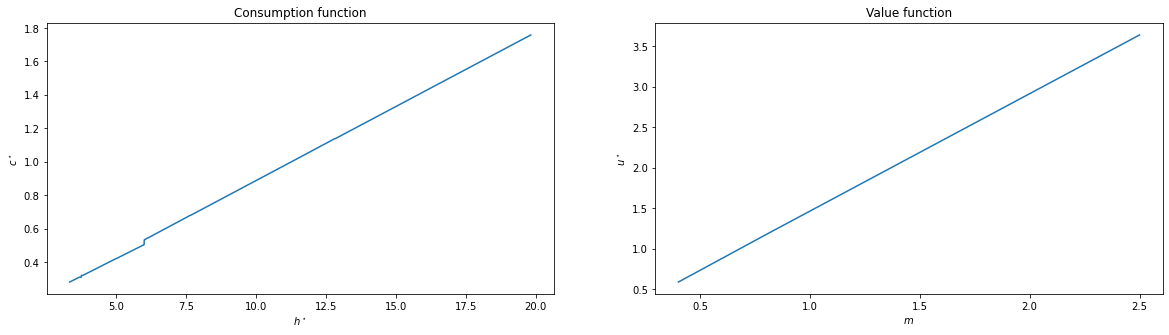

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))# figsize is in inches

ax = fig.add_subplot(1,2,1)
ax.plot(h_stars,c_stars)
ax.set_xlabel(f"$h^\star$")
ax.set_ylabel(f"$c^\star$")
ax.set_title(f'Consumption function')

ax_right = fig.add_subplot(1,2,2)
ax_right.plot(m_array,u_stars)
ax_right.set_xlabel(f"$m$")
ax_right.set_ylabel(f"$u^\star$")
ax_right.set_title(f'Value function')


plt.show()

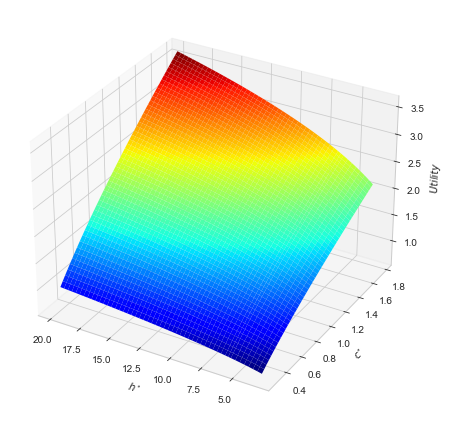

In [5]:
# evaluate utility function
def u(h, c, phi, **kwargs):
    return c**(1-phi)*h**phi


h_grid,c_grid = np.meshgrid(h_stars,c_stars,indexing='ij')
u_grid = u(h_grid,c_grid,**par1)

# import plot modules - figures should be inlined
%matplotlib inline 
import matplotlib.pyplot as plt # Base module for plotting
plt.style.use('seaborn-whitegrid') # whitegrid is nice for 3D
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
from matplotlib import cm # for colormaps

# write your code here
# a actual plot
fig = plt.figure(figsize= (12,6))
ax = fig.add_subplot(1, 1, 1, projection = '3d') # note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots
ax.plot_surface(h_grid, c_grid, u_grid, cmap = cm.jet) # 

# add labels
ax.set_xlabel('$h^{\star}$')
ax.set_ylabel('$c^{\star}$')
ax.set_zlabel('$Utility$')

ax.invert_xaxis() # invert xaxis. instead of x1 going from 1 to 3, it goes from 3 to 1

fig.tight_layout()
# fig.savefig('someplot_wireframe.png')
# fig.savefig('someplot_wireframe.pdf')


In [6]:
# from scipy import optimize


# def u_optimizer(phi, m, epsilon, r, tau_g, tau_p, p_bar, print_res = False, **kwargs):
#     sol = optimize.minimize_scalar(lambda h: value_of_choice(h,phi, m, epsilon, r, tau_g, tau_p, p_bar),
#                                   method = 'bounded', bounds = (0,m*10))
#     h = sol.x
#     h_cost = r*h+tau_g*h*epsilon+tau_p*max(h*epsilon-p_bar,0) 
#     c = m - h_cost
#     u = u_func(c,h,phi)
    
    
#     if print_res == True:
#         excess_dkk = m - h_cost - c
        
#         text = f'---'*35
#         text += '\nFor parameters:\n'
#         text += f'\u03C6={phi:.3f}'
#         text += f' m={m:.3f}'
#         text += f' \u03B5={epsilon:.3f}'
#         text += f' r={r:.3f}'
#         text += f' \u03C4ᵍ={tau_g:.3f}'
#         text += f' \u03C4ᵖ={tau_p:.3f}'
    
#         text += f'\nThe optimal allocation of ressources is consuming c={c:.3f} while buying a house of quality h={h:.3f} \n'
#         text += f'As the household pays no downpayment and only has to service interest-rate and housing taxes, the total spending amounts to:\n'
#         text += f'c={c:.3f} and buying a house of quality h={h:.3f} at a cost of {h_cost:.3f} leaving excess mDKK of {excess_dkk:.3f}\n\n'
#         text += f'Above allocation of ressources results in a utility of {u:.3f}\n'
#         text += f'---'*35
#         print(text)
    
    
#     return u, h, c

# u_star, h_star, c_star = u_optimizer(**par1, print_res = True)



# Q3

In [7]:
3
# Package import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
from scipy import optimize, interpolate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
import random


In [19]:
N = 10000
#i = 1
np.random.seed(1)
#print(random.seed(10))
m_i = np.random.lognormal(-0.4,0.35, size = N)
#m_i = random.lognormvariate(-0.4,0.35, size = N)
m_i
h_stars1 = np.empty(N)

In [9]:
for i in m_i:
    print(i)

1.1835529359554933
0.5411197123917636
0.5571837989681325
0.4604555203958158
0.907458603613587
0.29953064566456844
1.2345223294338552
0.5135425371749165
0.7495094775319939
0.6142952326789466
1.1182196003787142
0.3259376256368273
0.5987889851944321
0.5860096487283452
0.9968243578694995
0.45613706040804536
0.6310628152630923
0.49299785972746046
0.6802974236962468
0.8220001715731967
0.45602086587149304
1.0006535118897721
0.9190238105268304
0.7992136426709886
0.9187874955935573
0.5276591511945744
0.6420997722154554
0.4831059447903419
0.6103267387823735
0.8070452126914243
0.5261961310087958
0.5834107855023785
0.527023338922011
0.4986643900547113
0.529969328008388
0.6673553544644055
0.4533645994051531
0.7276358909005334
1.198332206281656
0.8691109000952736
0.6267908018863695
0.49131483865231385
0.5160738503991598
1.212105718538119
0.6823467728125797
0.5363606571869826
0.7166414878585251
1.3980652237519158
0.6991119678784257
0.8319533482046685
0.7445759717942965
0.5925693026750517
0.4493822714

In [20]:
for i, v in enumerate(m_i):
    constraints = ({'type': 'ineq', 'fun': lambda x: v-expenditure(x,**par1)})
    result_vector = optimize.minimize(lambda x: -u_func(x, **par1),
                                      initial_guess, method = 'SLSQP',
                                      constraints=constraints)
    
    # loading results
    h_stars1[i] = result_vector.x[0]


In [22]:
result_vector

     fun: -0.5963975143719324
     jac: array([-0.05297612, -1.4717361 ])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([3.37735673, 0.2836638 ])

In [28]:
#h_i = np.linspace(1,10,N)


def taxrev(tau_g, h_stars1, epsilon, tau_p, p_bar) :
    t = 0
    for i in range(N):
        Tax = (tau_g*h_stars1[i]*epsilon+tau_p*max(h_stars1[i]*epsilon-p_bar,0))
        t += Tax
    return t/N

print(taxrev(0.012, h_stars1,0.5, 0.004,3))

#print(T[:5])

0.036314404360136526


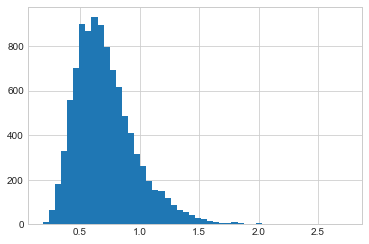

In [48]:
m_ifig = plt.hist(m_i, bins=50)

#plt.plot(h_stars1)
plt.show(m_ifig)


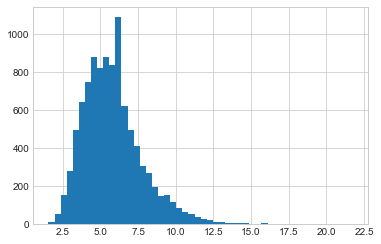

In [47]:
h_fig = plt.hist(h_stars1, bins=50)
plt.show(h_fig)
#the odd thing is the many observations around the house quality = 6

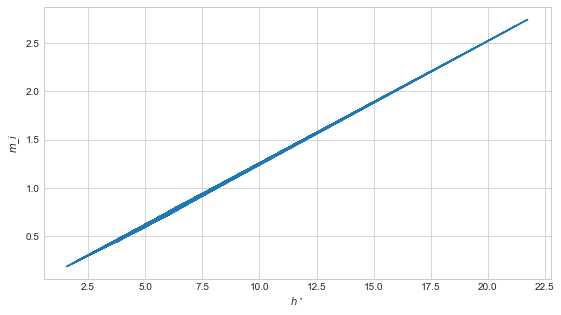

In [34]:
fig = plt.figure(figsize=(20,5))# figsize is in inches

ax = fig.add_subplot(1,2,1)
ax.plot(h_stars1,m_i)
ax.set_xlabel(f"$h^\star$")
ax.set_ylabel(f"$m\_i$")
#ax.set_title(f'Consumption function')

plt.show()